In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import numpy as np

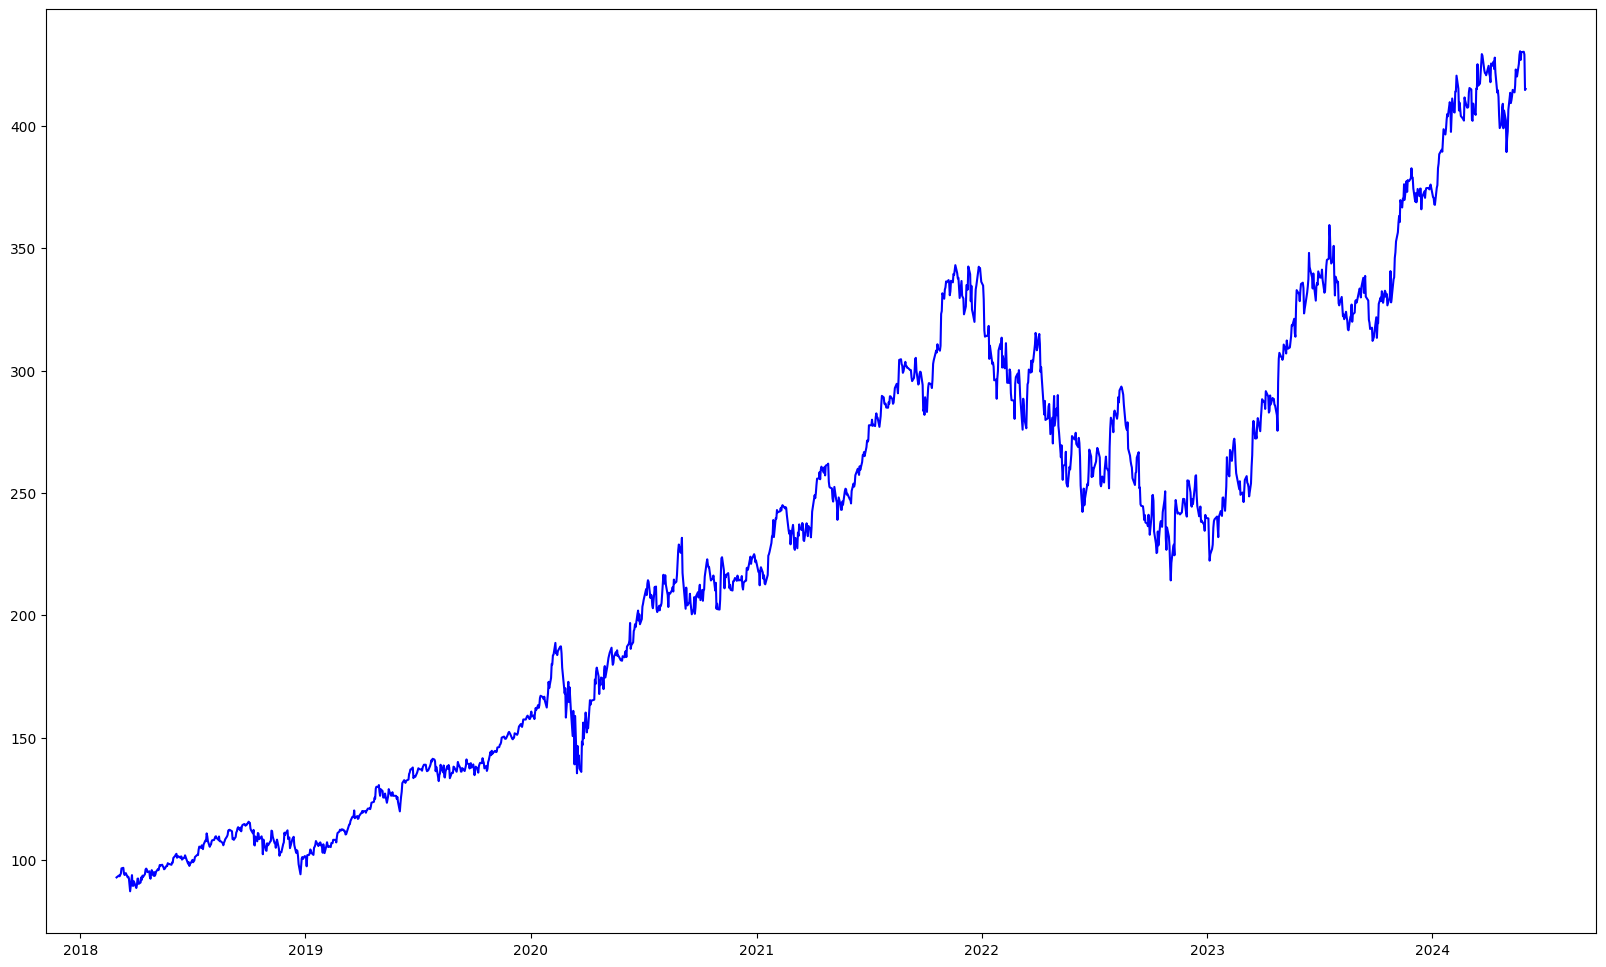

                Close
Date                 
2018-03-01  92.849998
2018-03-02  93.050003
2018-03-05  93.639999
2018-03-06  93.320000
2018-03-07  93.860001
             Close
count  1574.000000
mean    229.935578
std      92.452863
min      87.180000
25%     138.540005
50%     236.709999
75%     298.262490
max     430.519989


In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('D:/IS403_O21_HTCL_15/Dataset/MSFT.csv')

# Chọn cột 'Close' và cột 'Date'
df = df[['Date', 'Close']]

# Chuyển đổi cột 'Date' thành định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thiết lập cột 'Date' làm chỉ mục
df.set_index('Date', inplace=True)

# Vẽ biểu đồ dữ liệu
plt.figure(figsize=(20, 12))
plt.plot(df.index, df, label='Data AAPL', color='blue')
plt.show()

# Kiểm tra dữ liệu
print(df.head())
print(df.describe())

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])


In [3]:
# Định nghĩa bước thời gian
time_window = 40

#Chia pha train - test
train_size = int(len(df) * 0.7)
train_data = df[0:train_size]
test_data = df[train_size:len(df)]

print(train_data.tail())
print(test_data.head())
print(len(test_data))
#Lấy thêm time_window ngày từ tập train vào tập test để dự đoán ngày đầu tiên của tập test
test_data = pd.concat([train_data[-time_window:], test_data])

print(test_data.head(10))
print(len(test_data))

               Close
Date                
2022-07-08  0.525660
2022-07-11  0.516485
2022-07-12  0.484913
2022-07-13  0.482146
2022-07-14  0.486107
               Close
Date                
2022-07-15  0.493796
2022-07-18  0.486602
2022-07-19  0.501981
2022-07-20  0.509961
2022-07-21  0.517446
473
               Close
Date                
2022-05-17  0.523213
2022-05-18  0.486107
2022-05-19  0.483369
2022-05-20  0.481680
2022-05-23  0.505243
2022-05-24  0.502243
2022-05-25  0.510689
2022-05-26  0.520534
2022-05-27  0.541912
2022-05-31  0.537922
513


In [4]:

# Tạo hàm để tạo tập dữ liệu huấn luyện
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


# Tạo dữ liệu cho mô hình
X_train, y_train = create_dataset(train_data.values, time_window)
X_test, y_test = create_dataset(test_data.values, time_window)

In [5]:
# Xây dựng và huấn luyện mô hình MLP
# Build the model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dense(50, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
# model.fit(X_train, y_train)

c:\Users\GIAHUY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0186 - val_loss: 0.0014
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.3623e-04 - val_loss: 0.0013
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6470e-04 - val_loss: 0.0013
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8284e-04 - val_loss: 0.0012
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7356e-04 - val_loss: 0.0018
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3878e-04 - val_loss: 0.0012
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4121e-04 - val_loss: 9.5671e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7889e-04 - val_loss: 9.5290e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7569e-04 - val_loss: 8.2306e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7275e-04 - val_loss: 0.0012
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9889e-04 - val_loss: 0.0026
Epoch 12/1

In [6]:
# Dự đoán
# train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

test_data = test_data[time_window:]

print(len(X_test))
print(len(y_test))
print(len(test_data))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
473
473
473


In [7]:

# Đánh giá mô hình
# train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
# Reshape test_predict for compatibility with DataFrame creation
test_predict_reshaped = test_predict.reshape(-1, 1)

# Create a DataFrame with test_data index and test_predict values
predicted_test = pd.DataFrame(test_predict_reshaped, index=test_data.index, columns=["predicted_value"])


In [8]:
# Hàm dự đoán ngày tiếp theo
def predict_future(data, model, window_size, days):
    future_preds = []
    last_window = list(data[-window_size:])
    for _ in range(days):
        next_pred = model.predict(np.array(last_window).reshape(1, window_size))
        future_preds.append(next_pred[0, 0])  # Accessing the first element directly
        last_window.append(next_pred[0, 0])
        last_window.pop(0)
    return future_preds

# Dự đoán 90 ngày tiếp theo
days_to_predict = 90
future_predictions = predict_future(test_data['Close'].values, model, time_window, days_to_predict)

# Tạo các ngày tiếp theo
next_days_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days_to_predict)

# Tạo DataFrame cho các dự đoán tiếp theo
future_df = pd.DataFrame(future_predictions, index=next_days_index, columns=['Close Predict'])

train_data['Close'] = scaler.inverse_transform(train_data[['Close']])
test_data['Close'] = scaler.inverse_transform(test_data[['Close']])
future_df['Close Predict'] = scaler.inverse_transform(future_df[['Close Predict']])

print(future_df.head())
print(next_days_index)

# print(train_data.tail())
print(test_data.tail())
# print(predicted_test.head())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

C:\Users\GIAHUY\AppData\Local\Temp\ipykernel_23764\2781551278.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Close'] = scaler.inverse_transform(train_data[['Close']])


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đánh giá MAE
mae = mean_absolute_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Absolute Error (MAE):", mae)

# Đánh giá MSE
mse = mean_squared_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Squared Error (MSE):", mse)

# Đánh giá RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Đánh giá MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test_data['Close'], predicted_test['predicted_value'])
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 6.65545072422949
Mean Squared Error (MSE): 68.71778098685058
Root Mean Squared Error (RMSE): 8.28961886861215
Mean Absolute Percentage Error (MAPE): 2.208678266483557


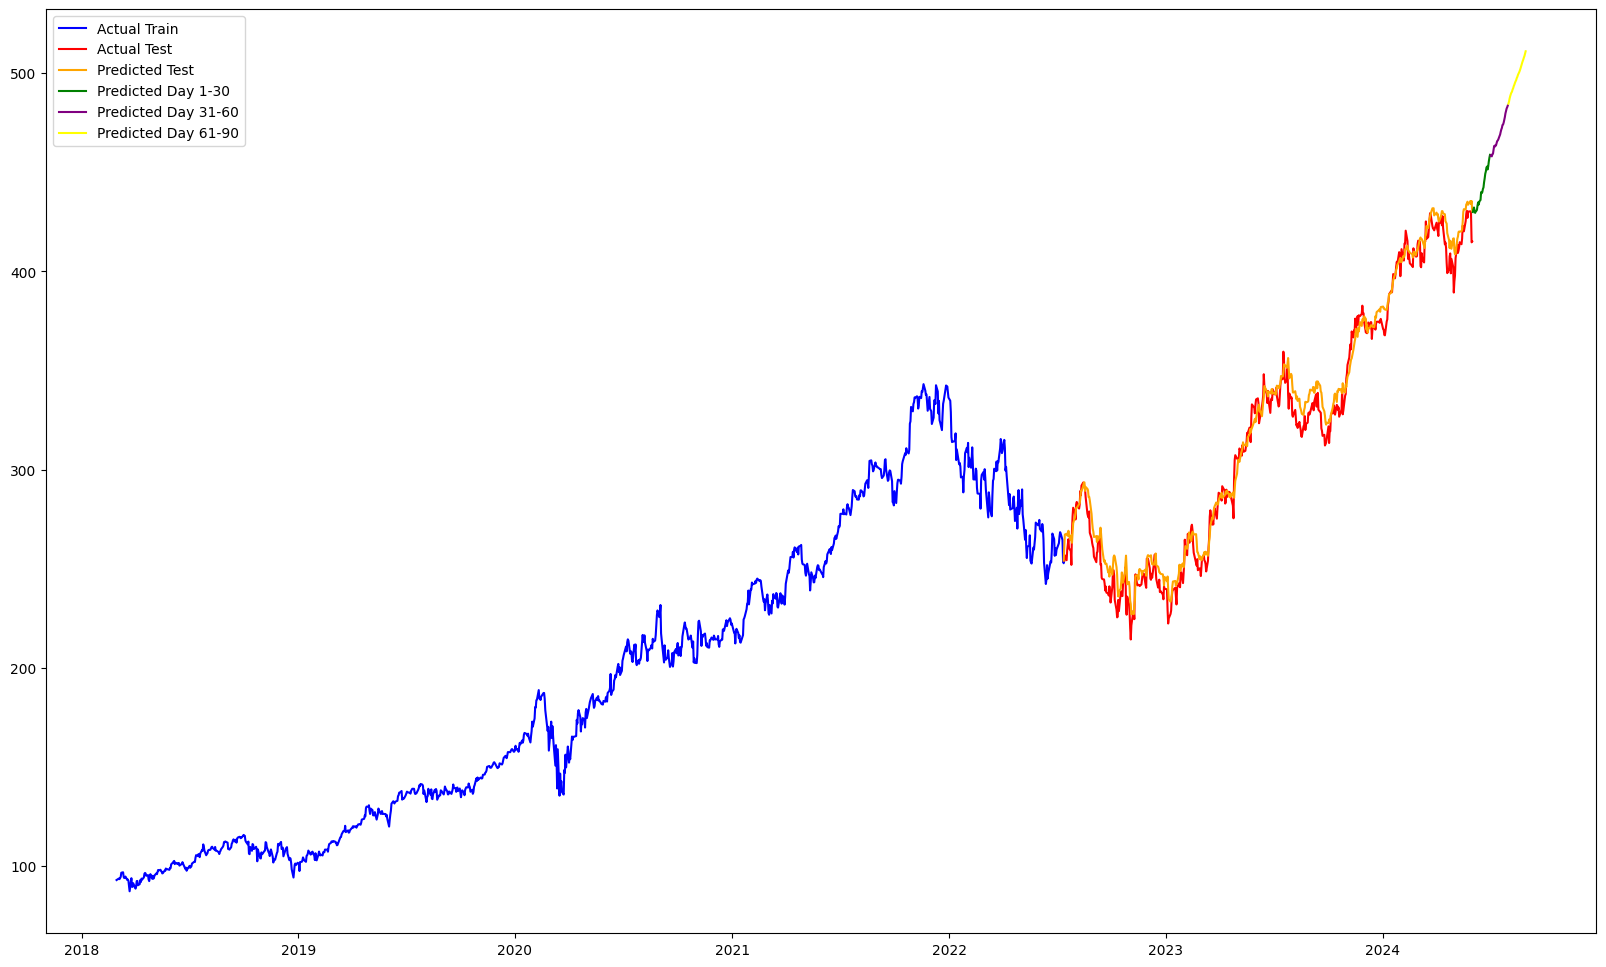

In [10]:
# Thêm phần tử cuối của train_data vào đầu của test_data và df_predicted
last_train_data = train_data.iloc[-1]
test_data = pd.concat([pd.DataFrame(last_train_data).T, test_data])
predicted_test = pd.concat([pd.DataFrame(last_train_data['Close'], index=[test_data.index[0] - pd.Timedelta(days=1)], columns=["predicted_value"]), predicted_test])

# Tạo 3 phần dữ liệu cho 90 ngày tiếp theo
future_df_1 = future_df[:30]
future_df_2 = future_df[30:60]
future_df_3 = future_df[60:]

# Vẽ biểu đồ dự đoán và thực tế
plt.figure(figsize=(20, 12))
plt.plot(train_data.index, train_data, label='Actual Train', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test', color='red')
plt.plot(predicted_test.index, predicted_test, label='Predicted Test', color='orange')
plt.plot(future_df_1.index, future_df_1, label='Predicted Day 1-30', color='green')
plt.plot(future_df_2.index, future_df_2, label='Predicted Day 31-60', color='purple')
plt.plot(future_df_3.index, future_df_3, label='Predicted Day 61-90', color='yellow')
plt.legend()
plt.show()
